In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()

scaled_df = scaler.fit_transform(market_data_df)

In [5]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index

scaled_df = pd.DataFrame(scaled_df, index= market_data_df.index, columns= market_data_df.columns)

# Display sample data

scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1,12))

# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for k in k_values: 
    kmean = KMeans(n_clusters=k, random_state= 0, n_init='auto')
    kmean.fit(scaled_df)
    inertia.append(kmean.inertia_)

print(f"Length of k_values: {len(k_values)}")
print(f"Length of inertia: {len(inertia)}")

# Create a dictionary with the data to plot the Elbow curve

elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame

print(df_elbow)


Length of k_values: 11
Length of inertia: 11
     k     inertia
0    1  287.000000
1    2  198.571818
2    3  145.635748
3    4   79.022435
4    5   66.217780
5    6   59.139070
6    7   48.406314
7    8   38.993588
8    9   34.400595
9   10   28.573603
10  11   23.890044


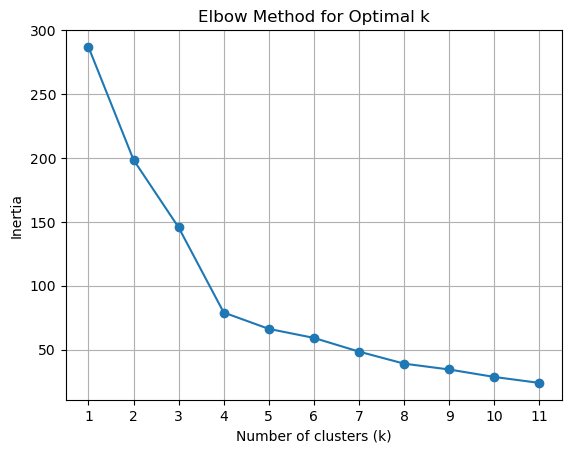

     k     inertia
0    1  287.000000
1    2  198.571818
2    3  145.635748
3    4   79.022435
4    5   66.217780
5    6   59.139070
6    7   48.406314
7    8   38.993588
8    9   34.400595
9   10   28.573603
10  11   23.890044


In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print(df_elbow)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k

best_k = 4

kmeans_model = KMeans(n_clusters= best_k, random_state= 0, n_init='auto')


In [9]:
# Fit the K-Means model using the scaled data

kmeans_model.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data

cluster_predictions = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values.

cluster_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [11]:
# Create a copy of the DataFrame

scaled_df_copy = scaled_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters

scaled_df_copy['cluster'] = cluster_predictions

# Display sample data

scaled_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

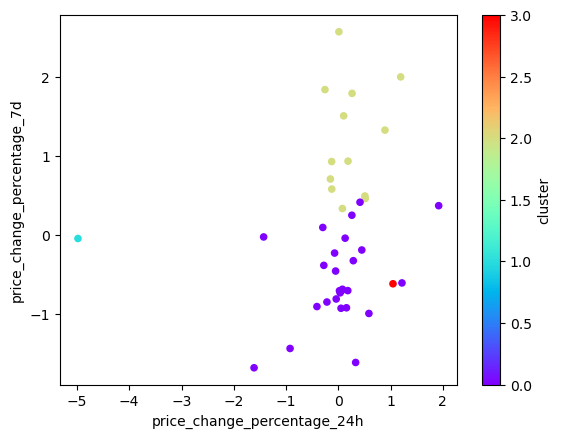

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

scaled_df_copy.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c = "cluster" ,colormap = "rainbow" )

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.

pca_model = PCA(n_components=3)


In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

pca = pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 

pca_df = pd.DataFrame(data= pca)


pca_df.head()

,0,1,2
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.

explained_variance_ratio = pca_model.explained_variance_ratio_

print("Explained Variance Ratio for each component:", explained_variance_ratio)

total_explained_variance = sum(explained_variance_ratio)
print("Total Explained Variance:", total_explained_variance)



Explained Variance Ratio for each component: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance: 0.895

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data

n_components = 3
pca_model = PCA(n_components=n_components)

# Fit and TRANSFORM the data using fit_transform
pca_data = pca_model.fit_transform(scaled_df) #This is the corrected line

# Create a DataFrame from the PCA RESULTS (pca_data)
pca_df = pd.DataFrame(data=pca_data, columns=[f'principal component {i+1}' for i in range(n_components)])

# Copy the index (if needed)
pca_df.index = scaled_df.index

# Display sample data

pca_df.head()


,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

pca_k_values = list(range(1,12))
print(pca_k_values)

# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


for k in k_values: 
    kmean_pca = KMeans(n_clusters=k, random_state= 0, n_init='auto')
    kmean_pca.fit(pca_df)
    inertia.append(kmean_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve

pca_elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow_pca = pd.DataFrame(pca_elbow_data)


# Display the DataFrame

df_elbow_pca.head()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


<Axes: title={'center': 'Elbow Curve for PCA'}, xlabel='k'>

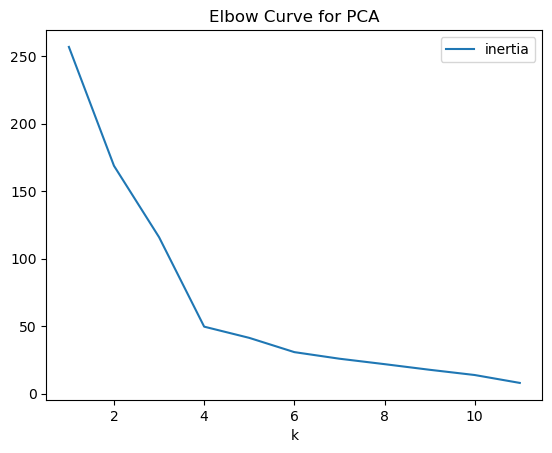

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


df_elbow_pca.plot.line(x="k", y="inertia", title="Elbow Curve for PCA")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 6


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes it does differ from the original data. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [35]:
# Initialize the K-Means model using the best value for k

best_k_pca = 3

kmeans_model_pca = KMeans(n_clusters= best_k_pca, random_state= 1, n_init='auto')



In [36]:
# Fit the K-Means model using the PCA data

kmeans_model_pca.fit(pca_df)

KMeans(n_clusters=3, random_state=1)

In [33]:
# Predict the clusters to group the cryptocurrencies using the PCA data

cluster_predictions_pca = kmeans_model_pca.predict(pca_df)

# View the resulting array of cluster values.

cluster_predictions_pca


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [38]:
# Create a copy of the DataFrame with the PCA data

df_stocks_pca_predictions = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters

df_stocks_pca_predictions["Predicted Cluster"] = cluster_predictions_pca

# Display sample data
df_stocks_pca_predictions.head()

,principal component 1,principal component 2,principal component 3,Predicted Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


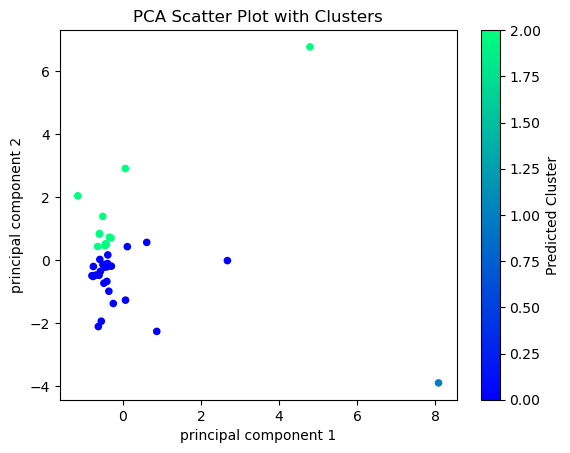

In [46]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

scatter_plot = df_stocks_pca_predictions.plot.scatter(
    x="principal component 1",
    y="principal component 2",
    c="Predicted Cluster",
    colormap = "winter",
    title="PCA Scatter Plot with Clusters"
)


### Determine the Weights of Each Feature on each Principal Component

In [76]:
# Use the columns from the original scaled DataFrame as the index.

pca_component_weights = pd.DataFrame(
    pca_model.components_.T,  # Transpose the components
    columns=["0", "1", "2" ],  # Ensure the number of columns matches
    index=scaled_df.columns  # Use the original scaled DataFrame columns as the index
)

pca_component_weights.head()

,0,1,2
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    Price change with in the 24 hours has the largest negative influence
